In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from src.compression import *
from src.decompression import *

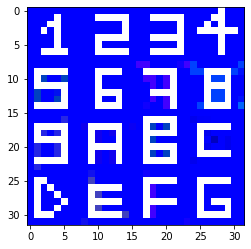

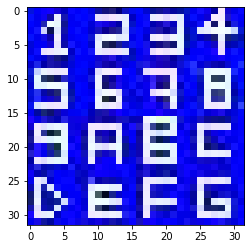

In [44]:
import imageio

image = imageio.imread("tiles-blue.png")
plt.imshow(image[...,:3])
plt.show()


imageio.imwrite("out.jpg", image[...,:3])
image2 = imageio.imread("out.jpg")
plt.imshow(image2)
plt.show()

In [3]:
def padding(img, unpadding_values, mode="black"):
    """
        Only work for 2d matrix.
    """
    # Round up to nearest multiple of 8
    w = (img.shape[0] + 7) & (-8)
    h = (img.shape[1] + 7) & (-8)

    # Smart padding -> Pad with image center in middle.
    delta_w = w - img.shape[0]
    delta_h = h - img.shape[1]
    
    ax1_top, ax1_bot, ax2_left, ax2_right = 0, 0, 0, 0

    if delta_w != 0:
        ax1_top, ax1_bot = (delta_w//2) , (delta_w//2)
        if delta_w % 2 == 1:    
            ax1_bot = (delta_w//2) + 1
    
    if delta_h != 0:
        ax2_left, ax2_right = (delta_h//2) , (delta_h//2)
        if delta_h % 2 == 1:
            ax2_right = (delta_h//2) + 1

    if mode == "black":
        img = np.pad(img, [(ax1_top , ax1_bot), (ax2_left, ax2_right)], 'constant')
    elif mode == "replicate":
        img = np.pad(img, [(ax1_top, ax1_bot), (ax2_left, ax2_right)], 'symmetric')
    else:
        raise ValueError("This mode doesn't exist")

    for key, val in zip(unpadding_values.keys(), [ax1_top , ax1_bot, ax2_left, ax2_right]):
        unpadding_values[key].append(val)

    return img

def unpadding(img, padding_option):
    n, m = img.shape
    ax1_top = padding_option["ax1_top"]
    ax1_bot = padding_option["ax1_bot"]
    ax2_left = padding_option["ax2_left"]
    ax2_right = padding_option["ax2_right"]
    return img[ax1_top:n-ax1_bot, ax2_left:m-ax2_right]

(8, 8)


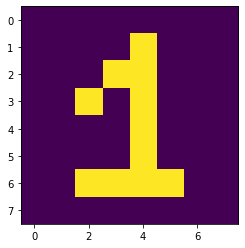

(8, 8)


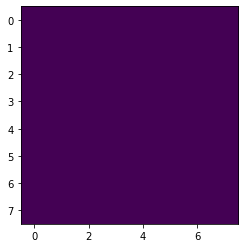

Exception: 

In [37]:
img = plt.imread("tiles-blue.png")[..., :3]        
img = np.transpose(img, (2, 0, 1))
unpadding_values = {
    "ax1_top": [],
    "ax1_bot": [],
    "ax2_left": [], 
    "ax2_right": []
}
largest_range = list(itertools.product(['0', '1'], repeat=15))

result = []

for channel in range(3):
    img_channel = padding(img[channel, ...], unpadding_values, mode="replicate")
    tmp_channel = []

    for block in block_splitting(img_channel):
        print(block.shape)
        plt.imshow(block)
        plt.show()

        # # Compression
        dct_block = dct(block)
        q_block = quantization(dct_block, Q_MAT)
        final_encoding = entropy_coding(q_block, largest_range)
        bitstream = "".join(map(str, np.concatenate([final_encoding])))

        # # Decompression
        q_block_retrieved = entropy_coding_inv(bitstream, largest_range)
        dct_block_retrieved = quantization_inv(q_block_retrieved, Q_MAT)
        block_retrieved = dct_inv(dct_block_retrieved)
        tmp_channel.append(block_retrieved)

        print(block_retrieved.shape)
        plt.imshow(block_retrieved)
        plt.show()

        raise Exception("")
    result.append(tmp_channel)
# result = np.concatenate(result, axis=2)

In [18]:
result.shape

AttributeError: 'list' object has no attribute 'shape'